# **Credit Risk Modelling**

Credit risk is the possibility that a borrower will not be able to make timely payments and will default on their debt. It refers to the possibility that a lender may not get the interest or principle due to them on time.

Financial organisations are concerned about reducing the risk of default. As a result, commercial and investment banks, venture capital funds, asset management organisations, and insurance corporations, to mention a few, are increasingly depending on technology to anticipate which customers are most likely to default on their obligations.

Machine Learning models have helped these companies in improving the accuracy of their credit risk analysis by giving a scientific technique for predicting potential debtors.

**We are going to model the probability of a person defaulting a loan.**

# **Importing the libraries and reading the data**

The data set was taken from kaggle for credit risk modelling. The data initially revealed a total of 25 features.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [4]:
# Reading the data 
credit_risk = pd.read_csv("UCI_Credit_Card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **Exploratory Data Analysis**

In [5]:
credit_risk.isna().sum() # Check NaNs values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

ID will not be helpful to predict loan default as there are no time dependencies all our samples are assumed i.i.d.

In [7]:
credit_risk = credit_risk.drop(columns='ID')

In [8]:
credit_risk.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# From the Data Description, we know that in df.EDUCATION, 5 and 6 represents "unknown" 
# Changing 0,5 and 6 to keep it under 1 category.

credit_risk['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
print(credit_risk.EDUCATION.value_counts())

# Same for column marriage
# Let's see the values count in column marriage
print(credit_risk['MARRIAGE'].value_counts())

# Here I am going to map 0 with 1
credit_risk['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
credit_risk['MARRIAGE'].value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

# **Column "PAY_0 to PAY_6" Analysis**

**PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)**

In [10]:
credit_risk['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

# **Data Visualization**

In [11]:
# Lets count them
credit_risk['default.payment.next.month'].value_counts() # Imbalanced dataset

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

Text(0.5, 1.0, 'Age distribution')

<Figure size 432x432 with 0 Axes>

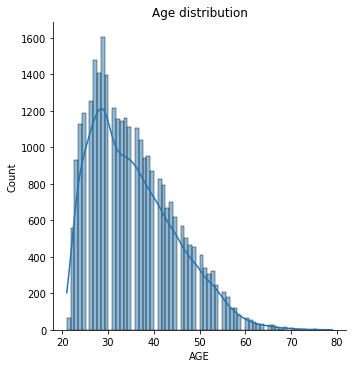

In [12]:
# with age column
plt.figure(figsize=(6,6))
sns.displot(credit_risk['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

<ipython-input-13-dbf452e5d8a6>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


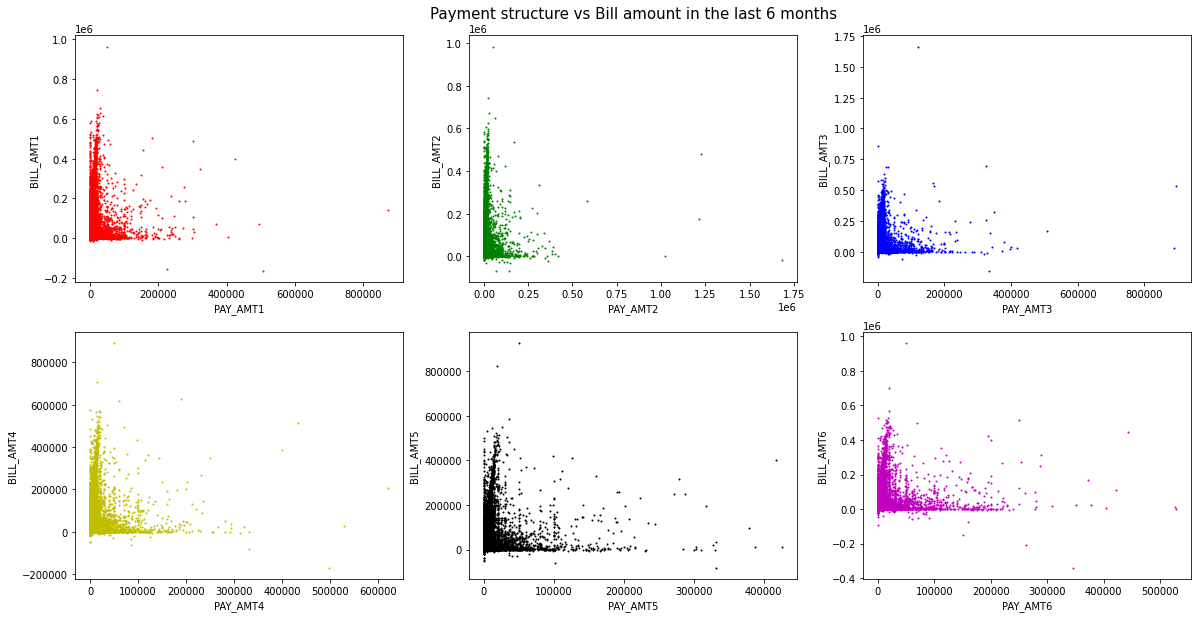

In [13]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=credit_risk.PAY_AMT1, y=credit_risk.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=credit_risk.PAY_AMT2, y=credit_risk.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=credit_risk.PAY_AMT3, y=credit_risk.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=credit_risk.PAY_AMT4, y=credit_risk.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=credit_risk.PAY_AMT5, y=credit_risk.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=credit_risk.PAY_AMT6, y=credit_risk.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

# **Modelling**

In [14]:
# Independent features
X = credit_risk.drop(['default.payment.next.month'], axis=1)
# Target 
y = credit_risk['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [15]:
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

# **Balancing the data**

In [17]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


# **Building Models**

Logistic Regression

Random Forest Classifier

XGBoost Classifier

LightGBM

CatBoost

Support Vector Machines Classifier



In [18]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

# Predicting the model
pred_logit = logit.predict(X_test)

# Evaluation metrics
print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

# Plot confusion metrics
# print(ConfusionMatrixDisplay(pred_logit, y_test.values))

# plot roc_auc curve
precision_recall_curve(pred_logit,y_test.values)

The accuracy of logit model is: 0.687
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



(array([0.38116667, 0.65575019, 1.        ]),
 array([1.        , 0.37647573, 0.        ]),
 array([0, 1]))

# **Random Forest Classifer**


In [19]:
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

# Predicting the model
pred_rf= rf.predict(X_test)

# Evaluating the model
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

# Plot confusion metrics
# print(ConfusionMatrixDisplay(pred_rf, y_test.values))

# plot precision_recall curve
precision_recall_curve(pred_rf,y_test.values)

The accuracy of logit model is: 0.793
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.53      0.47      0.50      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.79      6000



(array([0.19216667, 0.46610815, 1.        ]),
 array([1.        , 0.53078925, 0.        ]),
 array([0, 1]))

# **XGBoost Classifier**

In [20]:
xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)

## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

# Evaluating the model
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict))

# Plot confusion metrics
# print(ConfusionMatrixDisplay(xgb_predict,y_test.values))

# plot precision_recall curve
precision_recall_curve(xgb_predict,y_test.values)

The accuracy of logit model is: 0.8135
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4687
           1       0.61      0.40      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.80      0.81      0.80      6000



(array([0.14233333, 0.39908606, 1.        ]),
 array([1.        , 0.61358314, 0.        ]),
 array([0, 1]))

# **LightGBM Classifier**

In [ ]:
lgb_clf = lgb.LGBMClassifier()
#fitting the model
lgb_clf.fit(X_train,y_train)

## Predicting the model
lgb_predict= lgb_clf.predict(X_test)

# Evaluating the model
print("The accuracy of logit model is:", accuracy_score(y_test, lgb_predict))
print(classification_report(y_test,lgb_predict))

# Plot confusion metrics
# print(ConfusionMatrixDisplay(xgb_predict,y_test.values))

# plot precision_recall curve
precision_recall_curve(lgb_predict,y_test.values)

The accuracy of logit model is: 0.8136666666666666
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4687
           1       0.60      0.43      0.50      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.67      0.69      6000
weighted avg       0.80      0.81      0.80      6000



(array([0.15483333, 0.42802742, 1.        ]),
 array([1.        , 0.60495156, 0.        ]),
 array([0, 1]))

# **CatBoost Classifier**

In [ ]:
cat_clf = CatBoostClassifier()
#fitting the model
cat_clf.fit(X_train,y_train)

## Predicting the model
cat_predict= cat_clf.predict(X_test)

# Evaluating the model
print("The accuracy of logit model is:", accuracy_score(y_test, cat_predict))
print(classification_report(y_test,cat_predict))

# Plot confusion metrics
# print(ConfusionMatrixDisplay(xgb_predict,y_test.values))

# plot precision_recall curve
precision_recall_curve(cat_predict,y_test.values)

Learning rate set to 0.048342
0:	learn: 0.6798568	total: 80.6ms	remaining: 1m 20s
1:	learn: 0.6677679	total: 98ms	remaining: 48.9s
2:	learn: 0.6567321	total: 116ms	remaining: 38.5s
3:	learn: 0.6472390	total: 135ms	remaining: 33.6s
4:	learn: 0.6384079	total: 151ms	remaining: 30s
5:	learn: 0.6308153	total: 168ms	remaining: 27.8s
6:	learn: 0.6236205	total: 185ms	remaining: 26.3s
7:	learn: 0.6166313	total: 207ms	remaining: 25.6s
8:	learn: 0.6107904	total: 224ms	remaining: 24.6s
9:	learn: 0.6053306	total: 250ms	remaining: 24.8s
10:	learn: 0.5999396	total: 267ms	remaining: 24s
11:	learn: 0.5925686	total: 284ms	remaining: 23.4s
12:	learn: 0.5875304	total: 302ms	remaining: 22.9s
13:	learn: 0.5836813	total: 319ms	remaining: 22.5s
14:	learn: 0.5803146	total: 343ms	remaining: 22.5s
15:	learn: 0.5756877	total: 363ms	remaining: 22.3s
16:	learn: 0.5712045	total: 380ms	remaining: 22s
17:	learn: 0.5672790	total: 398ms	remaining: 21.7s
18:	learn: 0.5644313	total: 418ms	remaining: 21.6s
19:	learn: 0.561

(array([0.13533333, 0.3960396 , 1.        ]),
 array([1.        , 0.64039409, 0.        ]),
 array([0, 1]))

# **SVM Classifier**

In [ ]:
svc_clf = SVC()
#fitting the model
svc_clf.fit(X_train,y_train)

## Predicting the model
svc_predict= svc_clf.predict(X_test)

# Evaluating the model
print("The accuracy of logit model is:", accuracy_score(y_test, svc_predict))
print(classification_report(y_test,svc_predict))

# Plot confusion metrics
# print(ConfusionMatrixDisplay(xgb_predict,y_test.values))

# plot precision_recall curve
precision_recall_curve(svc_predict,y_test.values)

The accuracy of logit model is: 0.7786666666666666
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4687
           1       0.50      0.57      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



(array([0.2535    , 0.57349581, 1.        ]),
 array([1.        , 0.49506903, 0.        ]),
 array([0, 1]))

# **Hyperparameter tunning**

In [ ]:
## Hyper Parameter Optimization for XGBoost

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
random_search = RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Finding the best estimators
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Finding the best parameters
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [ ]:
classifier=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.2,
                                  learning_rate=0.15,
                                  max_depth=15,
                                  reg_lambda=10,
                                  min_child_weight=3,
                                  subsample=0.9, 
                                  colsample_bytree=0.4,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

# Predicting model
y_pred= classifier.predict(X_test)

# Evaluating the model after hyperparameter tuning
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

# Cross validation
score=cross_val_score(classifier,X,y,cv=10)

The accuracy of the model is: 0.805
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.58      0.40      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

In [ ]:
print(score)
print(score.mean())

[0.80866667 0.809      0.809      0.80666667 0.81033333 0.82266667
 0.838      0.828      0.827      0.81933333]
0.8178666666666666


In [ ]:
## Hyper Parameter Optimization for XGBoost

params={
 "iterations" : [500,1000,2000,3000],
 "max_leaves": [1024,2048,4096,8192,16384],
 "l2_leaf_reg": [1,3,10],
 "max_depth": [ 8, 10, 12, 16,32],
 "subsample": [ 0.2 , 0.4 , 0.8, 1],
 "grow_policy": ['Lossguide']
    
}

In [ ]:
random_search = RandomizedSearchCV(cat_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0:	learn: 0.6769082	total: 5.71s	remaining: 47m 30s
1:	learn: 0.6624061	total: 13.2s	remaining: 54m 35s
2:	learn: 0.6485924	total: 18.9s	remaining: 52m 5s
3:	learn: 0.6343632	total: 26.4s	remaining: 54m 39s
4:	learn: 0.6217601	total: 32s	remaining: 52m 43s
5:	learn: 0.6095716	total: 39.4s	remaining: 54m 2s
6:	learn: 0.5983157	total: 45s	remaining: 52m 48s
7:	learn: 0.5871728	total: 52.5s	remaining: 53m 46s
8:	learn: 0.5761828	total: 58.1s	remaining: 52m 51s
9:	learn: 0.5645354	total: 1m 5s	remaining: 53m 35s
10:	learn: 0.5551990	total: 1m 11s	remaining: 52m 43s
11:	learn: 0.5449485	total: 1m 18s	remaining: 53m 23s
12:	learn: 0.5349841	total: 1m 24s	remaining: 52m 41s
13:	learn: 0.5258609	total: 1m 31s	remaining: 53m 11s
14:	learn: 0.5169989	total: 1m 37s	remaining: 52m 37s
15:	learn: 0.5086487	total: 1m 45s	remaining: 53m 6s
16:	learn: 0.5000035	total: 1m 51s	remaining: 52m 45s
17:	learn: 0.4913822	total: 1m 58s	remaining: 52m 54s
18:	learn: 0.4836847	total: 2m 4s	remaining: 52m 40s
19

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f13496a9cd0>,
                   n_iter=5, n_jobs=-1,
                   param_distributions={'grow_policy': ['Lossguide'],
                                        'iterations': [500, 1000, 2000, 3000],
                                        'l2_leaf_reg': [1, 3, 10],
                                        'max_depth': [8, 10, 12, 16, 32],
                                        'max_leaves': [1024, 2048, 4096, 8192,
                                                       16384],
                                        'subsample': [0.2, 0.4, 0.8, 1]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Finding the best parameters
random_search.best_params_

{'subsample': 0.4,
 'max_leaves': 16384,
 'max_depth': 32,
 'l2_leaf_reg': 10,
 'iterations': 500,
 'grow_policy': 'Lossguide'}

In [21]:
classifier=CatBoostClassifier(subsample= 0.4,max_leaves= 16384,max_depth= 32,l2_leaf_reg= 10,iterations= 1000,grow_policy= 'Lossguide')

# Fitting the model
classifier.fit(X_train,y_train)

# Predicting model
y_pred= classifier.predict(X_test)

# Evaluating the model after hyperparameter tuning
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

# Cross validation
# score=cross_val_score(classifier,X,y,cv=10)

0:	learn: 0.6776466	total: 7.19s	remaining: 1h 59m 42s
1:	learn: 0.6649312	total: 13.6s	remaining: 1h 52m 49s
2:	learn: 0.6512360	total: 19s	remaining: 1h 45m 18s
3:	learn: 0.6367550	total: 25.6s	remaining: 1h 46m 6s
4:	learn: 0.6246919	total: 34.2s	remaining: 1h 53m 16s
5:	learn: 0.6118914	total: 39.1s	remaining: 1h 47m 54s
6:	learn: 0.5986745	total: 44.4s	remaining: 1h 45m 1s
7:	learn: 0.5861615	total: 49.1s	remaining: 1h 41m 30s
8:	learn: 0.5746364	total: 53.5s	remaining: 1h 38m 13s
9:	learn: 0.5640378	total: 59.1s	remaining: 1h 37m 28s
10:	learn: 0.5549206	total: 1m 4s	remaining: 1h 36m 32s
11:	learn: 0.5474938	total: 1m 9s	remaining: 1h 35m 57s
12:	learn: 0.5382434	total: 1m 14s	remaining: 1h 34m 2s
13:	learn: 0.5305043	total: 1m 19s	remaining: 1h 33m 42s
14:	learn: 0.5222308	total: 1m 24s	remaining: 1h 32m 5s
15:	learn: 0.5132803	total: 1m 28s	remaining: 1h 30m 49s
16:	learn: 0.5049779	total: 1m 34s	remaining: 1h 30m 49s
17:	learn: 0.4969513	total: 1m 38s	remaining: 1h 29m 44s
18